In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
root_path = "/Users/devasenan/Documents/conser-vision/data/"
# root_path = "C:/Users/devas/Documents/projects/conser-vision/data/"

In [3]:
size = 224

Reading Train data 

In [4]:
train_features = pd.read_csv(root_path+"train_features.csv")
train_features.shape

(16488, 3)

In [5]:
train_images = []
train_sites = []
for i in range(train_features.shape[0]):
    img=cv2.imread(root_path+train_features.iloc[i, 1])
    img = cv2.resize(img, (size, size))
    train_images.append(img)
    train_sites.append(train_features.iloc[i, 2])
train_images = np.array(train_images)
train_sites = np.array(train_sites)

In [7]:
train_images.shape

(16488, 224, 224, 3)

In [8]:
train_labels = pd.read_csv(root_path+'train_labels.csv')
classes = train_labels.columns[1:]

train_labels = train_labels.iloc[:, 1:]

In [9]:
train_labels

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16483,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16484,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Reading Test data

In [10]:
test_features = pd.read_csv(root_path+"test_features.csv")
test_features.shape

(4464, 3)

In [11]:
test_images = []
test_sites = []
for i in range(test_features.shape[0]):
    img = cv2.imread(root_path+test_features.iloc[i, 1])
    img = cv2.resize(img, (size, size))
    test_images.append(img)
    test_sites.append(test_features.iloc[i, 2])
test_images = np.array(test_images)
test_sites = np.array(test_sites)

In [12]:
test_images.shape

(4464, 224, 224, 3)

In [13]:
test_labels = pd.read_csv(root_path+'submission_format.csv')
test_labels = test_labels.iloc[:, 1:]

In [14]:
test_labels

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,0.048233,0.189185,0.044914,0.199588,0.106118,0.132915,0.166410,0.112637
1,0.097078,0.061400,0.026409,0.241530,0.144344,0.051780,0.287811,0.089648
2,0.124658,0.089101,0.189225,0.174494,0.180540,0.079995,0.085672,0.076314
3,0.109966,0.048397,0.055598,0.323600,0.322356,0.063252,0.008160,0.068671
4,0.165742,0.184610,0.005431,0.136806,0.000389,0.122078,0.151521,0.233423
...,...,...,...,...,...,...,...,...
4459,0.143675,0.185103,0.109074,0.158833,0.083497,0.010513,0.155293,0.154011
4460,0.068913,0.150572,0.197232,0.124579,0.131486,0.152534,0.039096,0.135588
4461,0.098239,0.149066,0.168635,0.086321,0.136863,0.077155,0.121480,0.162241
4462,0.036345,0.115411,0.302392,0.072757,0.105491,0.183422,0.106307,0.077875


In [15]:
train_images = train_images/255
test_images = test_images/255

In [16]:
import pickle
with open('train_images.pickle', 'wb') as train_imgs:
    pickle.dump(train_images, train_imgs)
    train_imgs.close()

with open('train_sites.pickle', 'wb') as train_st:
    pickle.dump(train_sites, train_st)
    train_st.close()

with open('train_labels.pickle', 'wb') as train_lbls:
    pickle.dump(train_labels, train_lbls)
    train_lbls.close()

with open('test_images.pickle', 'wb') as train_imgs:
    pickle.dump(test_images, train_imgs)
    train_imgs.close()

with open('test_sites.pickle', 'wb') as test_st:
    pickle.dump(test_sites, test_st)
    test_st.close()

with open('test_labels.pickle', 'wb') as test_lbls:
    pickle.dump(test_labels, test_lbls)
    test_lbls.close()

: 

: 

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 10))
    plt.imshow(X[index])
    class_index = np.argmax(y.iloc[index, :])
    plt.xlabel(classes[class_index])

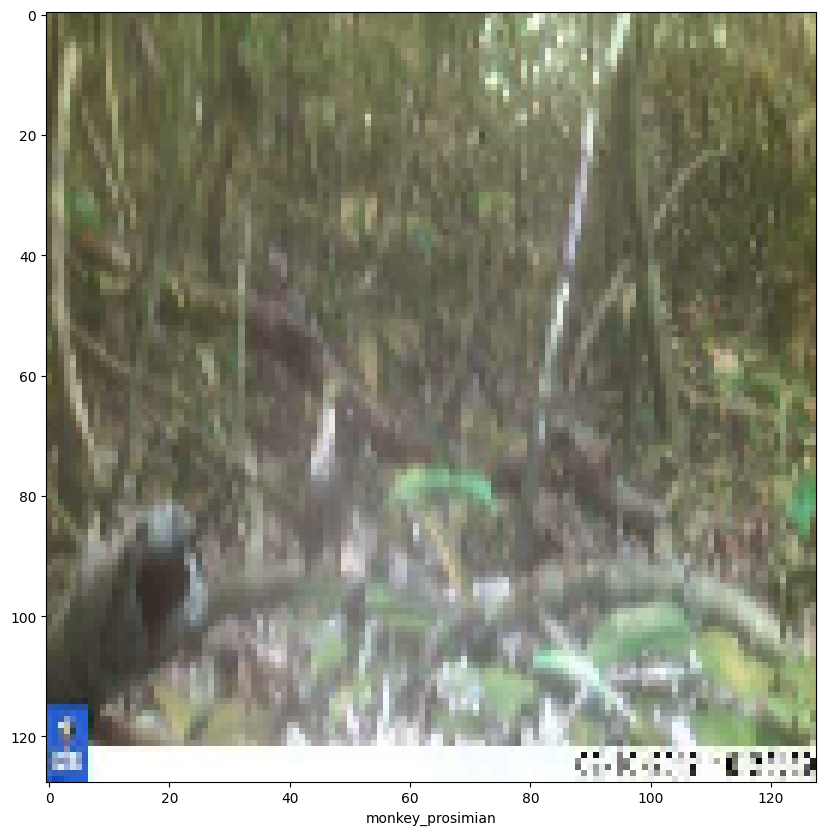

In [ ]:
plot_sample(train_images, train_labels, 3)